In [41]:
import torch
import nibabel as nib
import glob, os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### In this notebook, we try to find the datasets statistics of the Brain imaging datasets that we have collected up to this time: HCP, BRATS, IXI, OASIS3, ADNI1, ADNI2. The reason why we are investigating it is because we want to know which dataset is the largest so that we could start training (pre-training) our DAMIT model from the largest dataset and gradually adding the subsequent largest datasets

In [5]:
# First we start with BRATS 2020 as I assume it is the largest

path_to_brats = "/SSD/qasymjomart/BraTS/MICCAI_BraTS2020_TrainingData/"
list_of_t1s = glob.glob(f'{path_to_brats}/*/*t1.nii.gz')
print('BRATS 2020 Training set length: ', len(list_of_t1s))

BRATS 2020 Training set length:  369


BRATS 2023 Training set length:  1251
(240, 240, 155)


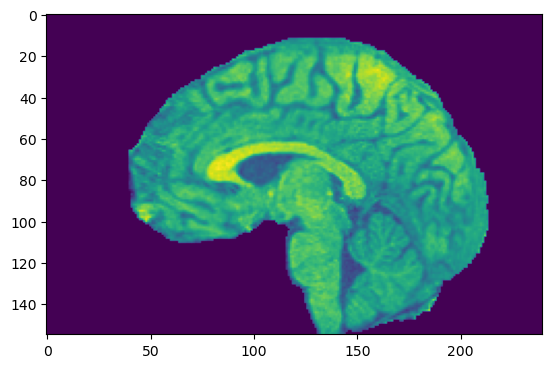

In [96]:
# BRATS 2023

path_to_brats = "/SSD/qasymjomart/BRATS2023/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/"
list_of_t1s = glob.glob(f'{path_to_brats}/*/*t1n.nii.gz')
print('BRATS 2023 Training set length: ', len(list_of_t1s))

x = nib.load(list_of_t1s[300]).get_fdata()
print(x.shape)
plt.imshow(x[120, :, ::-1].transpose(1, 0))

HCP set length:  1113
(256, 320, 320)


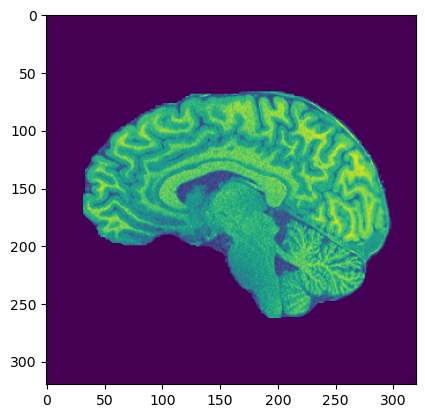

In [101]:
# HCP

path_to_brats = "/SSD/qasymjomart/HCP/hdbet/*/"
list_of_t1s = glob.glob(f'{path_to_brats}/hdbet_n4*MPR1.nii.gz')
print('HCP set length: ', len(list_of_t1s))

x = nib.load(list_of_t1s[0]).get_fdata()
print(x.shape)
plt.imshow(x[120, ::-1, ::-1].transpose(1, 0))

HCP set length:  2226
(256, 320, 320)


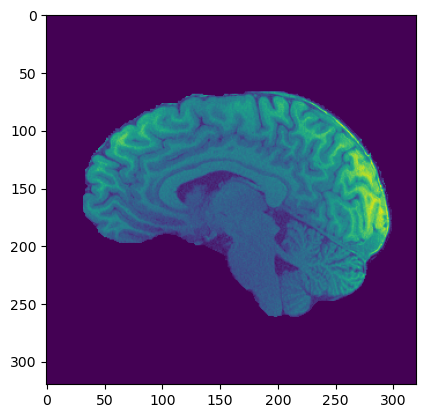

In [100]:
# HCP

path_to_brats = "/SSD/qasymjomart/HCP/hdbet/*/"
list_of_t1s = glob.glob(f'{path_to_brats}/hdbet*[!n4]*MPR1.nii.gz')
print('HCP set length: ', len(list_of_t1s))

x = nib.load(list_of_t1s[0]).get_fdata()
print(x.shape)
plt.imshow(x[120, ::-1, ::-1].transpose(1, 0))

IXI set length:  581
(256, 256, 150)


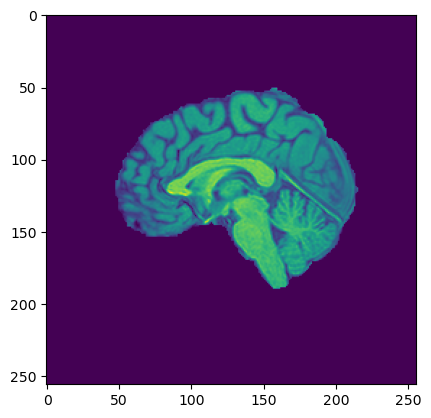

In [69]:
# IXI

path_to_brats = "/SSD/qasymjomart/IXI-T1/hdbet/"
list_of_t1s = glob.glob(f'{path_to_brats}/*/*T1.nii.gz')
print('IXI set length: ', len(list_of_t1s))

x = nib.load(list_of_t1s[0]).get_fdata()
print(x.shape)
plt.imshow(x[:, ::-1, 75].transpose(1, 0))

ADNI1 set length:  818
(256, 256, 180)


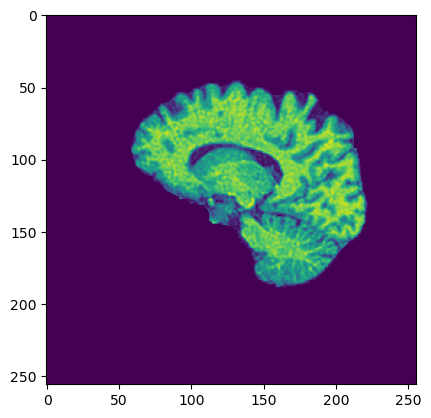

In [105]:
# ADNI1

path_to_brats = "/SSD/qasymjomart/uda/data/ADNI1_preprocessed_arranged/"
list_of_t1s = glob.glob(f'{path_to_brats}/*/hdbet_*[!mask].nii.gz')
print('ADNI1 set length: ', len(list_of_t1s))

x = nib.load(list_of_t1s[10]).get_fdata()
print(x.shape)
plt.imshow(x[:, :, 75])

ADNI2 set length:  839
(176, 240, 256)


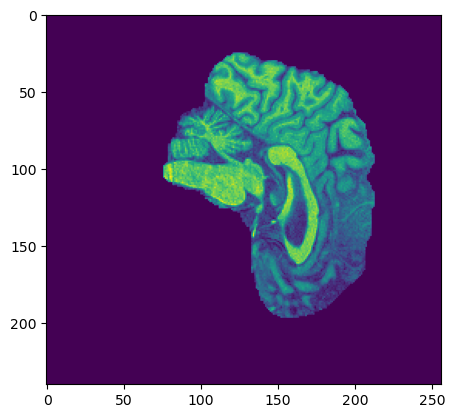

In [107]:
# ADNI2

path_to_brats = "/SSD/qasymjomart/uda/data/ADNI2/"
list_of_t1s = glob.glob(f'{path_to_brats}/*/hdbet_*[!mask].nii.gz')
print('ADNI2 set length: ', len(list_of_t1s))

x = nib.load(list_of_t1s[10]).get_fdata()
print(x.shape)
plt.imshow(x[90, :, :])

In [20]:
# OASIS-3

path_to_brats = "/SSD/qasymjomart/uda/data/OASIS3/scans/*/*/"
list_of_t1s = glob.glob(f'{path_to_brats}/*/hdbet*[!mask].nii.gz')
print('OASIS-3 set length: ', len(list_of_t1s))

OASIS-3 set length:  815


(176, 256, 256)


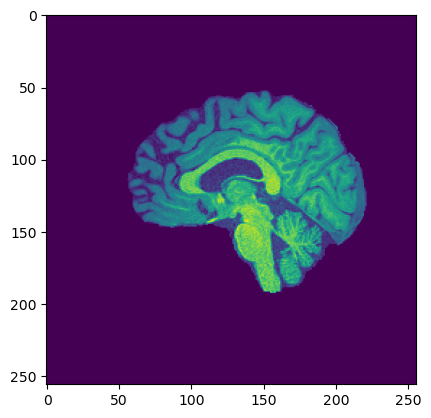

In [84]:
oasis_healthy_csv = "/SSD/qasymjomart/uda/data/OASIS3_CLOSEST_LABELS_ONLY_HEALTHY.csv"
datapath_list = []
datapath_temp_list = glob.glob("/SSD/qasymjomart/uda/data/OASIS3/scans/*/*/*/hdbet*[!mask].nii.gz")
# Step 1: Read the cfg["OASIS3"]["labelsroot"] file into a DataFrame and select the "filename" column
df_healthy_oasis3 = pd.read_csv(oasis_healthy_csv)
filenames = df_healthy_oasis3['filename'].tolist()
# Step 2: Remove the .json ending from each entry in the list, replace it with .nii.gz, and add 'hdbet_' as a prefix
filenames = ['hdbet_' + filename.replace('.json', '.nii.gz') for filename in filenames]
# Step 3: Select the subset of datapath_list where the filename matches with the entries of the earlier created list
datapath_list = datapath_list + [path for path in datapath_temp_list if os.path.basename(path) in filenames]

datapath_list[0], len(datapath_list)

x = nib.load(datapath_list[0]).get_fdata()
print(x.shape)
plt.imshow(x[90, ::-1, ::-1].transpose(1, 0))

# For OASIS-3 generate a csv file with only healthy subjects

In [70]:
oasis3_closest_labels = pd.read_csv("/SSD/qasymjomart/uda/data/OASIS3_CLOSEST_LABELS.csv")
oasis3_closest_labels

,Unnamed: 0,OASISID,MRI_LABEL,filename,SliceThickness,Label
0,0,OAS31116,OAS31116_MR_d0329,sub-OAS31116_ses-d0329_run-01_T1w.json,1.0,NORMCOG
1,1,OAS30067,OAS30067_MR_d0057,sub-OAS30067_ses-d0057_T1w.json,1.0,NORMCOG
2,2,OAS30476,OAS30476_MR_d0090,sub-OAS30476_ses-d0090_T1w.json,1.0,NORMCOG
3,3,OAS30747,OAS30747_MR_d0338,sub-OAS30747_ses-d0338_run-01_T1w.json,1.0,NORMCOG
4,4,OAS30289,OAS30289_MR_d0160,sub-OAS30289_ses-d0160_T1w.json,1.0,NORMCOG
...,...,...,...,...,...,...
810,815,OAS30612,OAS30612_MR_d0039,sub-OAS30612_ses-d0039_T1w.json,1.0,NORMCOG
811,816,OAS30605,OAS30605_MR_d0063,sub-OAS30605_ses-d0063_run-02_T1w.json,1.0,AD
812,817,OAS31135,OAS31135_MR_d0498,sub-OAS31135_ses-d0498_run-02_T1w.json,1.0,AD
813,818,OAS30994,OAS30994_MR_d0070,sub-OAS30994_ses-d0070_T1w.json,1.0,AD


In [71]:
oasis3_closest_labels.Label.value_counts()

NORMCOG    625
AD         165
MCI         25
Name: Label, dtype: int64

In [72]:
condition = oasis3_closest_labels['Label'] == 'NORMCOG'
oasis3_closest_labels_NORMCOG = oasis3_closest_labels[condition]
oasis3_closest_labels_NORMCOG

,Unnamed: 0,OASISID,MRI_LABEL,filename,SliceThickness,Label
0,0,OAS31116,OAS31116_MR_d0329,sub-OAS31116_ses-d0329_run-01_T1w.json,1.0,NORMCOG
1,1,OAS30067,OAS30067_MR_d0057,sub-OAS30067_ses-d0057_T1w.json,1.0,NORMCOG
2,2,OAS30476,OAS30476_MR_d0090,sub-OAS30476_ses-d0090_T1w.json,1.0,NORMCOG
3,3,OAS30747,OAS30747_MR_d0338,sub-OAS30747_ses-d0338_run-01_T1w.json,1.0,NORMCOG
4,4,OAS30289,OAS30289_MR_d0160,sub-OAS30289_ses-d0160_T1w.json,1.0,NORMCOG
...,...,...,...,...,...,...
794,799,OAS30949,OAS30949_MR_d1418,sub-OAS30949_ses-d1418_run-01_T1w.json,1.0,NORMCOG
805,810,OAS31155,OAS31155_MR_d7635,sub-OAS31155_ses-d7635_run-01_T1w.json,1.0,NORMCOG
807,812,OAS31056,OAS31056_MR_d0808,sub-OAS31056_ses-d0808_T1w.json,1.0,NORMCOG
809,814,OAS31045,OAS31045_MR_d1901,sub-OAS31045_ses-d1901_run-01_T1w.json,1.0,NORMCOG


In [73]:
oasis3_closest_labels_NORMCOG.to_csv('/SSD/qasymjomart/uda/data/OASIS3_CLOSEST_LABELS_ONLY_HEALTHY.csv', index=False)

In [74]:
test_oasis3_closest_labels_NORMCOG = pd.read_csv('/SSD/qasymjomart/uda/data/OASIS3_CLOSEST_LABELS_ONLY_HEALTHY.csv')
test_oasis3_closest_labels_NORMCOG

,Unnamed: 0,OASISID,MRI_LABEL,filename,SliceThickness,Label
0,0,OAS31116,OAS31116_MR_d0329,sub-OAS31116_ses-d0329_run-01_T1w.json,1.0,NORMCOG
1,1,OAS30067,OAS30067_MR_d0057,sub-OAS30067_ses-d0057_T1w.json,1.0,NORMCOG
2,2,OAS30476,OAS30476_MR_d0090,sub-OAS30476_ses-d0090_T1w.json,1.0,NORMCOG
3,3,OAS30747,OAS30747_MR_d0338,sub-OAS30747_ses-d0338_run-01_T1w.json,1.0,NORMCOG
4,4,OAS30289,OAS30289_MR_d0160,sub-OAS30289_ses-d0160_T1w.json,1.0,NORMCOG
...,...,...,...,...,...,...
620,799,OAS30949,OAS30949_MR_d1418,sub-OAS30949_ses-d1418_run-01_T1w.json,1.0,NORMCOG
621,810,OAS31155,OAS31155_MR_d7635,sub-OAS31155_ses-d7635_run-01_T1w.json,1.0,NORMCOG
622,812,OAS31056,OAS31056_MR_d0808,sub-OAS31056_ses-d0808_T1w.json,1.0,NORMCOG
623,814,OAS31045,OAS31045_MR_d1901,sub-OAS31045_ses-d1901_run-01_T1w.json,1.0,NORMCOG


In [76]:
test_oasis3_closest_labels_NORMCOG.filename

0      sub-OAS31116_ses-d0329_run-01_T1w.json
1             sub-OAS30067_ses-d0057_T1w.json
2             sub-OAS30476_ses-d0090_T1w.json
3      sub-OAS30747_ses-d0338_run-01_T1w.json
4             sub-OAS30289_ses-d0160_T1w.json
                        ...                  
620    sub-OAS30949_ses-d1418_run-01_T1w.json
621    sub-OAS31155_ses-d7635_run-01_T1w.json
622           sub-OAS31056_ses-d0808_T1w.json
623    sub-OAS31045_ses-d1901_run-01_T1w.json
624           sub-OAS30612_ses-d0039_T1w.json
Name: filename, Length: 625, dtype: object